In [13]:
# Importing the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**About the dataset**:
1. The dataset consists of 8 features
(independent variable) and 1 target (dependent variable).

2. The target feature "Outcome" consists of categorical values (0: non-diabetic, 1: diabetic)

**Data Preprocessing**
1. **Replacing the NAN values**, in the feature columns there are some NAN values which are replaced by the median of the column.
2. Sperating **Features** and **Target** and putting them in NumPy array so easy canculations.
3. **Standardize Features:**
Standardizing the features for Gradient Descent. After, standardization the mean equates to 0 and std. deviation to 1.

In [3]:
# Replace zeros values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())

In [4]:
# Separate features and target
X = df.drop('Outcome', axis=1).values  # Convert to numpy array
y = df['Outcome'].values  # Convert to numpy array

In [5]:
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [6]:
# Standardize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term (bias)
X = np.c_[np.ones(X.shape[0]), X]  # Add column of 1s for bias

In [7]:
print(X)

[[ 1.          0.63994726  0.86604475 ...  0.16724016  0.46849198
   1.4259954 ]
 [ 1.         -0.84488505 -1.20506583 ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.          1.23388019  2.01666174 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 1.          0.3429808  -0.02157407 ... -0.90976751 -0.68519336
  -0.27575966]
 [ 1.         -0.84488505  0.14279979 ... -0.34215536 -0.37110101
   1.17073215]
 [ 1.         -0.84488505 -0.94206766 ... -0.29849289 -0.47378505
  -0.87137393]]


**Logistic Regression Implementation**
1. Sigmoid Function(Logistic Fucntion): Since the target variable is categorical. It limits the target variable, by converting the input in probability between 0 and 1.

2. Cost Function(Log Loss): Descrbies how much the calculated value deviates from the actual value.

3. Gradient Descent: An optimization algorithm, which is responsible for the learning of best-fitting parameters.

4. Predcition: after training the model on traing dataset, I used the parameters to predict the unseen data.
If prob >= 0.5 (class 1:diabetic), prob < 0.5 (class 2: diabetic)

In [8]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Log Loss)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    # Avoid log(0) by adding small epsilon
    epsilon = 1e-15
    cost = (-1/m) * (np.sum(y * np.log(h + epsilon) + (1-y) * np.log(1-h + epsilon)))
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta)) # current predictions
        gradient = (1/m) * np.dot(X.T, (h - y)) # calculating the gradient
        theta = theta - alpha * gradient # updating the weights
        cost = compute_cost(X, y, theta) # computing the cost at every iteration
        cost_history.append(cost) # accumulate the above cost

    return theta, cost_history

# Prediction function
def predict(X, theta, threshold=0.5):
    return sigmoid(np.dot(X, theta)) >= threshold

**Training the Logistic Model**

In [9]:
np.random.seed(42)
theta = np.random.randn(X.shape[1])  # Random initialization of weights
alpha = 0.01  # Learning rate
num_iterations = 5000  # Increased iterations for better convergence

theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Make predictions
y_pred = predict(X, theta)

**Logistic Model Evaluation**
1. Accuracy: It tells about the number of correct predictions.
Give a True/False matrix and also the percetnage of the accuracy.

2. Confusion Matrix: tells about the prodcitions.<br>
TP(Ture Positive):  Diabetic truly predicted.<br>
TN (True Negative): Non-diabetic truly predicted.<br>
FP(Flase Positive): Non-diabetic and wrongly predicted Diabetic.<br>
FN(False Negative): Diabetic and wrongly predicted Non-diabetic.


In [10]:
# Accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
tp = np.sum((y_pred == 1) & (y == 1))
tn = np.sum((y_pred == 0) & (y == 0))
fp = np.sum((y_pred == 1) & (y == 0))
fn = np.sum((y_pred == 0) & (y == 1))
print("\nConfusion Matrix:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

Accuracy: 0.7760

Confusion Matrix:
True Positives (TP): 152
True Negatives (TN): 444
False Positives (FP): 56
False Negatives (FN): 116


**Cost Funtion Visualization**

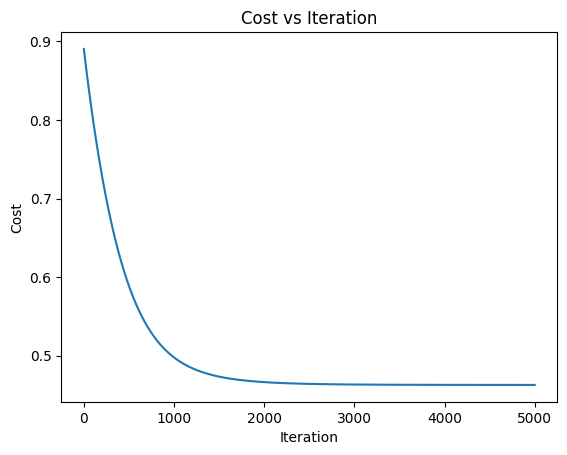

In [11]:
# Visualize Cost History
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

It shows how Cost Fucntion values are changing with each iteration.<br> The smooth curve indicates that the model has been trained correctly.

**Logistic Regression Plot(Decision Boundary and Sigmoid Curve)**<br>
1. Decision Boundary:<br>We have 8 features in total but, to plor Decision boundary we use onyl 2 features(2D plot).<br>
We chose, **Glucose** and **BMI** since, importnatn features for diabetes.

2. Sigmoid Curve Plot:<br>
It plots the curve for the Sigmoid function, where x-axis represents linear combination and proabbility on y-axis.<br>
it shows z=0 where prob= 0.5

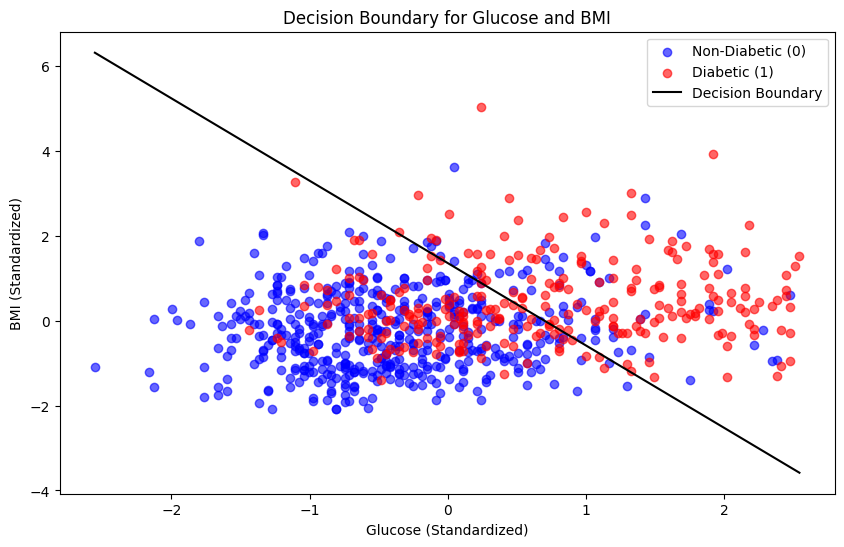

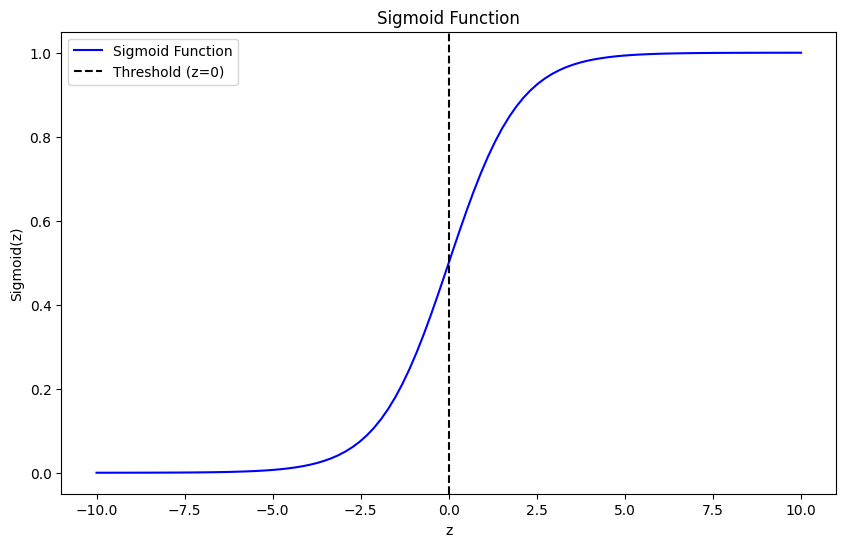

In [12]:
# Decision boundary
glucose_idx = 2  # Glucose is 2nd feature after bias
bmi_idx = 6     # BMI is 6th feature after bias

# Creating a simplified X with only Glucose and BMI (with bias term)
X_plot = np.c_[np.ones(X.shape[0]), X[:, [glucose_idx, bmi_idx]]]

# Train a new model on these 2 features
theta_plot = np.random.randn(X_plot.shape[1])
theta_plot, _ = gradient_descent(X_plot, y, theta_plot, alpha=0.01, num_iterations=5000)

# 1. Decision Boundary Plot
plt.figure(figsize=(10, 6))
# Scatter plot of data points
plt.scatter(X_plot[y == 0][:, 1], X_plot[y == 0][:, 2], c='blue', label='Non-Diabetic (0)', alpha=0.6)
plt.scatter(X_plot[y == 1][:, 1], X_plot[y == 1][:, 2], c='red', label='Diabetic (1)', alpha=0.6)

# Decision boundary:
x1 = np.linspace(X_plot[:, 1].min(), X_plot[:, 1].max(), 100)
x2 = -(theta_plot[0] + theta_plot[1] * x1) / theta_plot[2]
plt.plot(x1, x2, 'k-', label='Decision Boundary')

plt.xlabel('Glucose (Standardized)')
plt.ylabel('BMI (Standardized)')
plt.title('Decision Boundary for Glucose and BMI')
plt.legend()
plt.show()

# 2. Sigmoid Curve Plot
plt.figure(figsize=(10, 6))
z = np.linspace(-10, 10, 100)
sigmoid_z = sigmoid(z)
plt.plot(z, sigmoid_z, 'b-', label='Sigmoid Function')
plt.axvline(0, color='k', linestyle='--', label='Threshold (z=0)')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.legend()
plt.show()